# **Ricky Ponting EDA**

Ricky Thomas Ponting AO (born 19 December 1974) is an Australian cricket coach, commentator, and former cricketer. Ponting was captain of the Australian national team during its "golden era", between 2004 and 2011 in Test cricket and 2002 and 2011 in One Day Internationals (ODIs) and is the most successful captain in international cricket history, with 220 victories in 324 matches with a winning rate of 67.91%. He is widely considered to be one of the greatest batsmen of all time and in December 2006 reached the highest rating achieved by a Test batsman for 50 years, although this was surpassed by Steve Smith in December 2017.[2] He stands third in the list of cricketers by number of international centuries scored.

**Importing Necessary Libraries**

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'whitegrid')
sns.set_palette("dark:#5A9_r")

# **TEST CAREER ( Data Cleaning )**

**Loading the DataSet**

In [10]:
test = pd.read_csv('/content/Test_Ponting.csv')
test.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Column1,Opposition,Ground,Start DateAscending,Column2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,96,236,184,8,0,52.17,5,lbw,2.0,NaN,v Sri Lanka,Perth,08-Dec-95,Test # 1317
2,71,125,94,9,1,75.53,6,caught,1.0,NaN,v Sri Lanka,Melbourne,26-Dec-95,Test # 1319
3,DNB,-,-,-,-,-,-,-,4.0,NaN,v Sri Lanka,Melbourne,26-Dec-95,Test # 1319
4,6,31,27,0,0,22.22,6,caught,1.0,NaN,v Sri Lanka,Adelaide,25-Jan-96,Test # 1324


**Dropping unnecessary columns**

In [ ]:
test.drop(columns = ['Column1', 'Column2', 'BF', 'Mins'], inplace = True)

In [43]:
test.drop(columns = ['Mins'], inplace = True)

In [44]:
test.head()

,Runs,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start DateAscending
1,96.0,8,0,52.17,5,lbw,2.0,v Sri Lanka,Perth,08-Dec-95
2,71.0,9,1,75.53,6,caught,1.0,v Sri Lanka,Melbourne,26-Dec-95
3,NaN,-,-,-,-,-,4.0,v Sri Lanka,Melbourne,26-Dec-95
4,6.0,0,0,22.22,6,caught,1.0,v Sri Lanka,Adelaide,25-Jan-96
5,20.0,2,0,32.78,6,caught,3.0,v Sri Lanka,Adelaide,25-Jan-96


**Checking null values and Dropping them**

In [22]:
test.isnull().sum()

Runs                    8
Mins                   44
4s                     45
6s                     45
SR                     45
Pos                    45
Dismissal              45
Inns                   45
Opposition             45
Ground                 45
Start DateAscending    45
dtype: int64

In [23]:
test.dropna(inplace = True)

**Checking Dtypes**

In [28]:
test.dtypes

Runs                    object
Mins                    object
4s                      object
6s                      object
SR                      object
Pos                     object
Dismissal               object
Inns                   float64
Opposition              object
Ground                  object
Start DateAscending     object
dtype: object

**In Runs column removing '*'**

In [37]:
test['Runs'] = test['Runs'].str.replace('*', '')

<ipython-input-37-5d8c57d0ea7d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test['Runs'] = test['Runs'].str.replace('*', '')


**Removing DNB records and replacing with NaN and Converting to Float**

In [38]:
def dnb(value):
    if (value=='DNB'):
        return np.nan
    else:
        return float(value)

test['Runs'] = test['Runs'].apply(dnb)

In [45]:
test.head()

,Runs,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start DateAscending
1,96.0,8,0,52.17,5,lbw,2.0,v Sri Lanka,Perth,08-Dec-95
2,71.0,9,1,75.53,6,caught,1.0,v Sri Lanka,Melbourne,26-Dec-95
3,NaN,-,-,-,-,-,4.0,v Sri Lanka,Melbourne,26-Dec-95
4,6.0,0,0,22.22,6,caught,1.0,v Sri Lanka,Adelaide,25-Jan-96
5,20.0,2,0,32.78,6,caught,3.0,v Sri Lanka,Adelaide,25-Jan-96


# **EDA on Test Career**

**Q1) What are No. of Test Hundreds Scored ?**

In [46]:
test.head(2)

,Runs,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start DateAscending
1,96.0,8,0,52.17,5,lbw,2.0,v Sri Lanka,Perth,08-Dec-95
2,71.0,9,1,75.53,6,caught,1.0,v Sri Lanka,Melbourne,26-Dec-95


In [49]:
test[test['Runs'] >= 100].value_counts().sum()

41

He had scored 41 test match hundreds

**Q2)How many Test Hundreds he scored on Sydney ?**

In [68]:
k = test[(test['Runs'] >= 100) & (test['Ground'] == 'Sydney')]
new_k = k.reset_index()
new_k.drop(columns = ['index'], inplace = True)
new_k.drop(columns = ['Inns'], inplace = True)
new_k

,Runs,4s,6s,SR,Pos,Dismissal,Opposition,Ground,Start DateAscending
0,141.0,17,1,77.04,6,not out,v India,Sydney,02-Jan-00
1,169.0,23,2,67.87,3,bowled,v Zimbabwe,Sydney,17-Oct-03
2,207.0,30,0,62.34,3,bowled,v Pakistan,Sydney,02-Jan-05
3,120.0,12,1,68.96,3,lbw,v South Africa,Sydney,02-Jan-06
4,143.0,16,0,89.93,3,not out,v South Africa,Sydney,02-Jan-06
5,134.0,14,0,59.55,4,caught,v India,Sydney,03-Jan-12


He scored 6 Hundreds on SCG

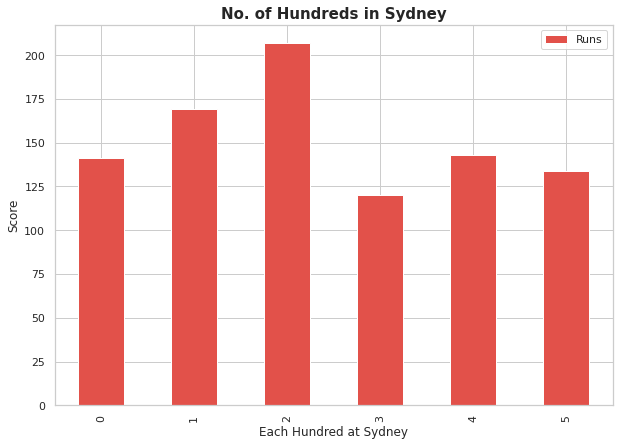

In [117]:
ax = new_k.plot(kind = 'bar')
plt.title('No. of Hundreds in Sydney', weight='bold').set_fontsize('15')
ax.set(xlabel = 'Each Hundred at Sydney', ylabel = 'Score')
plt.gcf().set_size_inches(10, 7)
plt.show()

**Q3) How many Double Centuries does he have ?**

In [96]:
double_hundreds = test[test['Runs'] >= 200]
double_hundreds = double_hundreds.reset_index()

In [119]:
double_hundreds.drop(columns = ['Inns'], inplace = True)

In [122]:
double_hundreds

,Runs,4s,6s,SR,Pos,Dismissal,Opposition,Ground,Start DateAscending
0,206.0,24,1,56.9,3,stumped,v West Indies,Port of Spain,19-Apr-03
1,242.0,31,0,68.75,3,caught,v India,Adelaide,12-Dec-03
2,257.0,25,0,56.11,3,stumped,v India,Melbourne,26-Dec-03
3,207.0,30,0,62.34,3,bowled,v Pakistan,Sydney,02-Jan-05
4,209.0,25,0,59.03,3,caught,v Pakistan,Hobart,14-Jan-10
5,221.0,21,0,54.7,4,caught,v India,Adelaide,24-Jan-12


<Figure size 1440x1080 with 0 Axes>

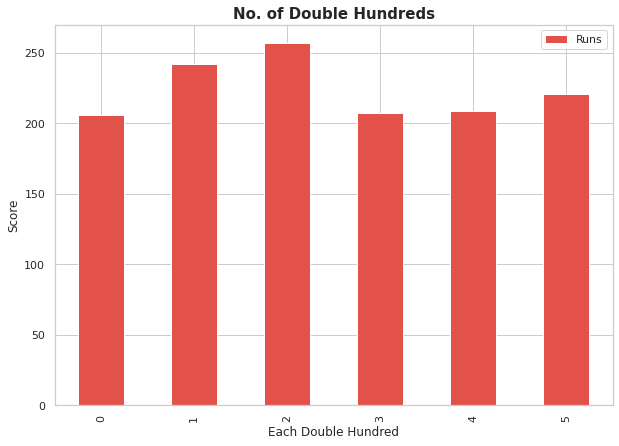

In [124]:
plt.figure(figsize=(20, 15))
ax = double_hundreds.plot(kind = 'bar')

plt.title('No. of Double Hundreds', weight='bold').set_fontsize('15')
ax.set(xlabel = 'Each Double Hundred', ylabel = 'Score')
plt.gcf().set_size_inches(10, 7)
plt.show()

He scored 6 Double hundreds

**Q4) How many Hundreds he Scored against India ?**

In [131]:
hundreds_ind = test[(test['Runs'] >= 100) & (test['Opposition'] == 'v India')]

In [133]:
hundreds_ind = hundreds_ind.reset_index()

In [137]:
hundreds_ind.drop(columns = ['index', 'Inns'], inplace = True)

In [138]:
hundreds_ind

,Runs,4s,6s,SR,Pos,Dismissal,Opposition,Ground,Start DateAscending
0,125.0,15,0,63.13,6,run out,v India,Adelaide,10-Dec-99
1,141.0,17,1,77.04,6,not out,v India,Sydney,02-Jan-00
2,242.0,31,0,68.75,3,caught,v India,Adelaide,12-Dec-03
3,257.0,25,0,56.11,3,stumped,v India,Melbourne,26-Dec-03
4,140.0,10,0,52.63,3,bowled,v India,Adelaide,24-Jan-08
5,123.0,13,0,50.61,3,lbw,v India,Bengaluru,09-Oct-08
6,134.0,14,0,59.55,4,caught,v India,Sydney,03-Jan-12
7,221.0,21,0,54.7,4,caught,v India,Adelaide,24-Jan-12


He scored 8 Test Match Hundreds against India

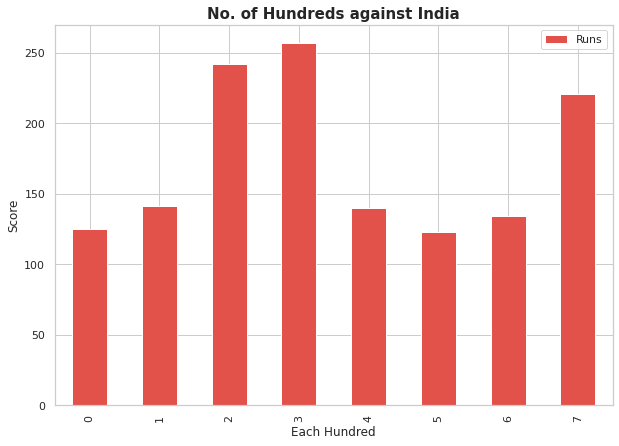

In [139]:
ax = hundreds_ind.plot(kind = 'bar')
plt.title('No. of Hundreds against India', weight='bold').set_fontsize('15')
ax.set(xlabel = 'Each Hundred', ylabel = 'Score')
plt.gcf().set_size_inches(10, 7)
plt.show()

**Q5)How many Runs he Scored against Enland in Tests ?**

In [142]:
test.groupby('Opposition')['Runs'].sum()

Opposition
v Bangladesh       260.0
v England         2476.0
v ICC World XI     100.0
v India           2555.0
v New Zealand     1076.0
v Pakistan        1537.0
v South Africa    2132.0
v Sri Lanka        975.0
v West Indies     1977.0
v Zimbabwe         290.0
Name: Runs, dtype: float64

He scored 2476 runs against England in Test

**Q6) Make a bar graph on Number of runs scored against each nation**

In [143]:
nation = test.groupby('Opposition')['Runs'].sum()

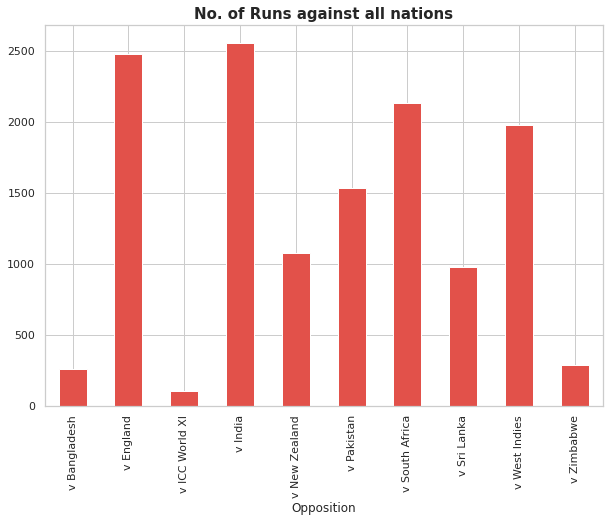

In [152]:
nation.plot(kind = "bar")
plt.title('No. of Runs against all nations', weight='bold').set_fontsize('15')
plt.gcf().set_size_inches(10, 7)
plt.show()

**Q7) In which ground did he scored most runs? Show Top 5 using bar graph.**

In [158]:
fav = test.groupby('Ground')['Runs'].sum().sort_values(ascending = False).head(5)

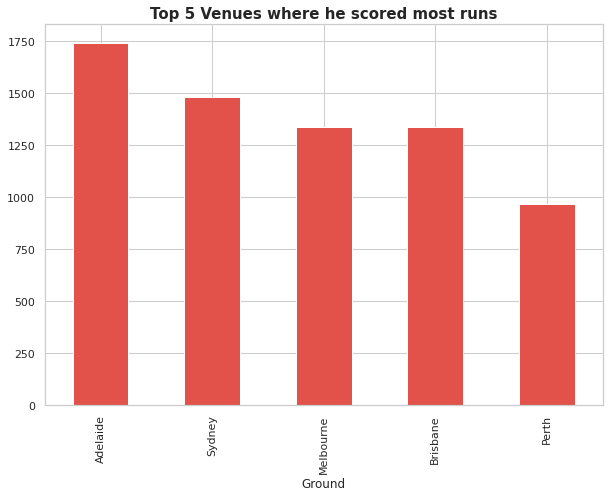

In [159]:
fav.plot(kind = "bar")
plt.title('Top 5 Venues where he scored most runs', weight='bold').set_fontsize('15')
plt.gcf().set_size_inches(10, 7)
plt.show()

He's favorite ground was Adleide !

**Q8) In which Year he Scored Most Runs? Show top 5 years.**

In [163]:
test.head()

,Runs,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start DateAscending
1,96.0,8,0,52.17,5,lbw,2.0,v Sri Lanka,Perth,08-Dec-95
2,71.0,9,1,75.53,6,caught,1.0,v Sri Lanka,Melbourne,26-Dec-95
3,NaN,-,-,-,-,-,4.0,v Sri Lanka,Melbourne,26-Dec-95
4,6.0,0,0,22.22,6,caught,1.0,v Sri Lanka,Adelaide,25-Jan-96
5,20.0,2,0,32.78,6,caught,3.0,v Sri Lanka,Adelaide,25-Jan-96


In [166]:
test['Year'] = pd.to_datetime(test['Start DateAscending']).dt.year

In [167]:
test.head()

,Runs,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start DateAscending,Year
1,96.0,8,0,52.17,5,lbw,2.0,v Sri Lanka,Perth,08-Dec-95,1995
2,71.0,9,1,75.53,6,caught,1.0,v Sri Lanka,Melbourne,26-Dec-95,1995
3,NaN,-,-,-,-,-,4.0,v Sri Lanka,Melbourne,26-Dec-95,1995
4,6.0,0,0,22.22,6,caught,1.0,v Sri Lanka,Adelaide,25-Jan-96,1996
5,20.0,2,0,32.78,6,caught,3.0,v Sri Lanka,Adelaide,25-Jan-96,1996


In [175]:
year_wise = test.groupby('Year')['Runs'].sum().sort_values(ascending = False).head(5)

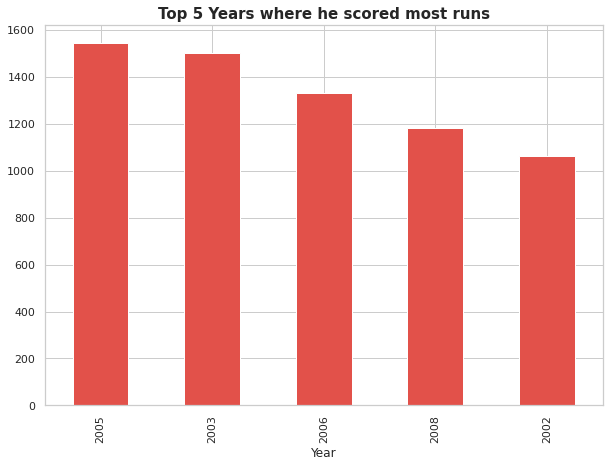

In [177]:
year_wise.plot(kind = "bar")
plt.title('Top 5 Years where he scored most runs', weight='bold').set_fontsize('15')
plt.gcf().set_size_inches(10, 7)
plt.show()

He scored the most number of runs in Year 2005

**Q9) Show total number of Runs, 100s and 50s scored.**

In [178]:
test[test['Runs'] >= 100].value_counts().sum()

41

In [181]:
test[(test['Runs'] >= 50) & (test['Runs'] < 100)].value_counts().sum()

62

In [182]:
test['Runs'].sum()

13378.0

Hence he scored 13378 Runs

He scored 41 Test hundreds

He scored 61 Test fifties

# **ODI CAREER ( Data Cleaning )**

**Loading the DataSet**

In [239]:
odi = pd.read_csv('/content/ODI_Ponting.csv')
odi.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Column1,Opposition,Ground,Start DateAscending,Column2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,12,6,0,0,16.66,6,bowled,2,NaN,v South Africa,Wellington,15-Feb-95,ODI # 975
2,10*,13,8,1,0,125,6,not out,1,NaN,v New Zealand,Auckland,19-Feb-95,ODI # 978
3,62,112,92,1,1,67.39,3,caught,1,NaN,v India,Dunedin,22-Feb-95,ODI # 979
4,7*,9,6,0,0,116.66,6,not out,2,NaN,v New Zealand,Auckland,26-Feb-95,ODI # 983


**Dropping unnecessary columns**

In [240]:
odi.drop(columns = ['Mins', 'BF', 'SR', 'Column1', 'Column2'], inplace = True)

**Checking null values and Dropping them**

In [241]:
odi.isnull().sum()

Runs                    8
4s                     45
6s                     45
Pos                    45
Dismissal              45
Inns                   45
Opposition             45
Ground                 45
Start DateAscending    45
dtype: int64

In [242]:
odi.dropna(inplace = True)

**Checking Dtypes**

In [243]:
odi.dtypes

Runs                   object
4s                     object
6s                     object
Pos                    object
Dismissal              object
Inns                   object
Opposition             object
Ground                 object
Start DateAscending    object
dtype: object

**Removing unnecessary chars from columns**

In [244]:
odi['Runs'] = odi['Runs'].str.replace('*', '')

<ipython-input-244-db2e6e66eff9>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  odi['Runs'] = odi['Runs'].str.replace('*', '')


In [245]:
odi['4s'] = odi['4s'].str.replace('-', '')

In [246]:
odi['6s'] = odi['6s'].str.replace('-', '')

In [247]:
odi['Inns'] = odi['Inns'].str.replace('-', '')

In [281]:
odi['Dismissal'] = odi['Dismissal'].str.replace('-', 'Not recorded')

**Changing Dtypes of 4s, 6s, Inns to Numeric**

In [248]:
odi['4s'] = pd.to_numeric(odi['4s'])

In [249]:
odi['6s'] = pd.to_numeric(odi['6s'])

In [250]:
odi['Inns'] = pd.to_numeric(odi['Inns'])

**Removing DNB values from Runs and replacing with NaN**

In [251]:
def dnb(value):
    if (value=='DNB' or value=='TDNB'):
        return np.nan
    else:
        return float(value)

odi['Runs'] = odi['Runs'].apply(dnb)

**Renaming Columns**

In [254]:
odi.rename(columns = {'Start DateAscending': 'Date'}, inplace = True)

**Adding a new column YEAR**

In [300]:
odi['Year'] = pd.to_datetime(odi['Date']).dt.year

**Cleaned DataSet after Clearning**

In [301]:
odi.head()

,Runs,4s,6s,Pos,Dismissal,Inns,Opposition,Ground,Date,Year
1,1.0,0.0,0.0,6,bowled,2.0,v South Africa,Wellington,15-Feb-95,1995
2,10.0,1.0,0.0,6,not out,1.0,v New Zealand,Auckland,19-Feb-95,1995
3,62.0,1.0,1.0,3,caught,1.0,v India,Dunedin,22-Feb-95,1995
4,7.0,0.0,0.0,6,not out,2.0,v New Zealand,Auckland,26-Feb-95,1995
5,43.0,3.0,0.0,3,caught,2.0,v West Indies,Port of Spain,12-Mar-95,1995


# **EDA on ODI Career**

In [302]:
odi.head()

,Runs,4s,6s,Pos,Dismissal,Inns,Opposition,Ground,Date,Year
1,1.0,0.0,0.0,6,bowled,2.0,v South Africa,Wellington,15-Feb-95,1995
2,10.0,1.0,0.0,6,not out,1.0,v New Zealand,Auckland,19-Feb-95,1995
3,62.0,1.0,1.0,3,caught,1.0,v India,Dunedin,22-Feb-95,1995
4,7.0,0.0,0.0,6,not out,2.0,v New Zealand,Auckland,26-Feb-95,1995
5,43.0,3.0,0.0,3,caught,2.0,v West Indies,Port of Spain,12-Mar-95,1995


**Q1)How many sixes and fours he scored in his ODI Career?**

In [260]:
odi['6s'].sum()

162.0

In [261]:
odi['4s'].sum()

1231.0

He scored 162 sixes and 1231 fours in his ODI Career

**Q2) Which type of dismissal made him out most of the time?**

In [282]:
dismisalls = odi['Dismissal'].value_counts()
dismisalls

caught            212
not out            38
bowled             34
lbw                34
run out            31
stumped            15
                   10
retired notout      1
Name: Dismissal, dtype: int64

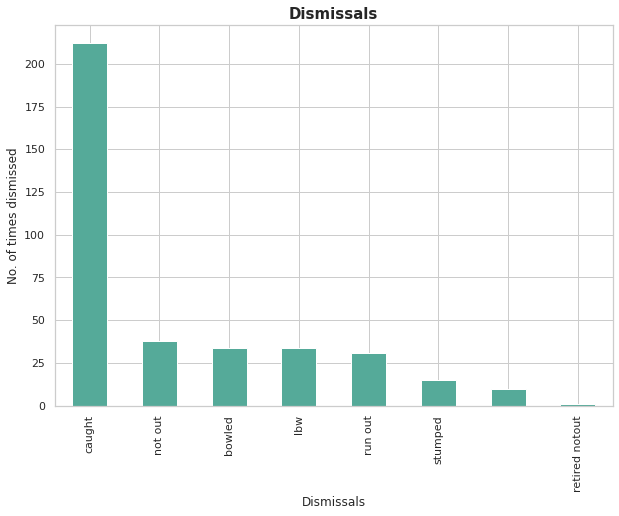

In [283]:
ax = dismisalls.plot(kind = 'bar')

plt.title('Dismissals', weight='bold').set_fontsize('15')
ax.set(xlabel = 'Dismissals', ylabel = 'No. of times dismissed')
plt.gcf().set_size_inches(10, 7)
plt.show()

Here the second last column with whitespace represents that data was not recorded properly

**Q3) Was he good at batting first or chasing ?**

In [287]:
ins = odi.groupby('Inns')['Runs'].sum()

In [288]:
ins

Inns
1.0    8630.0
2.0    5074.0
Name: Runs, dtype: float64

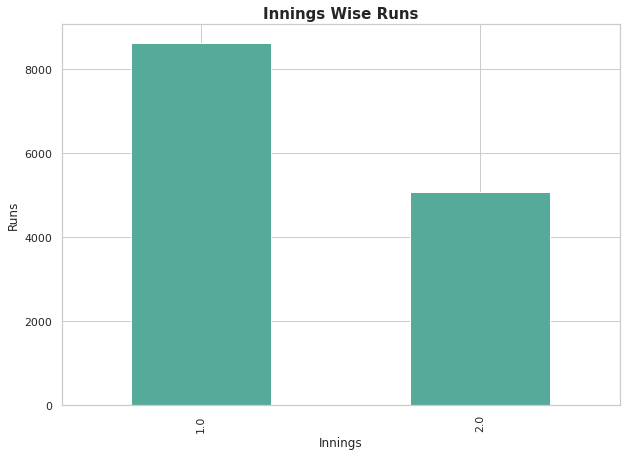

In [292]:
ax = ins.plot(kind = 'bar')

plt.title('Innings Wise Runs', weight='bold').set_fontsize('15')
ax.set(xlabel = 'Innings', ylabel = 'Runs')
plt.gcf().set_size_inches(10, 7)
plt.show()

He scored more runs while batting first

**Q4) In which batting position he scored most number of runs ?**

In [293]:
poss = odi.groupby('Pos')['Runs'].sum()

In [297]:
poss1 = poss.sort_values(ascending = False).head(3)

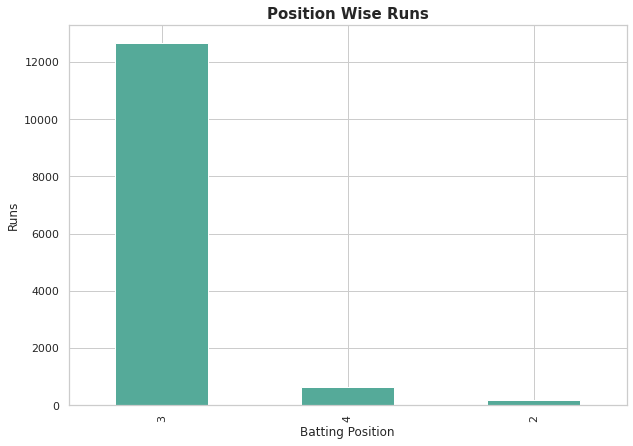

In [299]:
ax = poss1.plot(kind = 'bar')
plt.title('Position Wise Runs', weight='bold').set_fontsize('15')
ax.set(xlabel = 'Batting Position', ylabel = 'Runs')
plt.gcf().set_size_inches(10, 7)
plt.show()

He scored 12k runs at number 3

**Q5) What were his top 5 favourite Venues ?**

In [303]:
odi.head(2)

,Runs,4s,6s,Pos,Dismissal,Inns,Opposition,Ground,Date,Year
1,1.0,0.0,0.0,6,bowled,2.0,v South Africa,Wellington,15-Feb-95,1995
2,10.0,1.0,0.0,6,not out,1.0,v New Zealand,Auckland,19-Feb-95,1995


In [306]:
ven = odi.groupby('Ground')['Runs'].sum()

In [309]:
top5_ven = ven.sort_values(ascending = False).head(5)

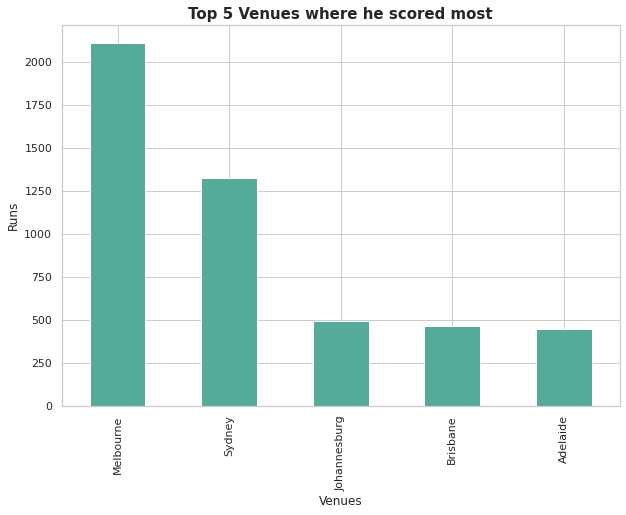

In [311]:
ax = top5_ven.plot(kind = 'bar')
plt.title('Top 5 Venues where he scored most', weight='bold').set_fontsize('15')
ax.set(xlabel = 'Venues', ylabel = 'Runs')
plt.gcf().set_size_inches(10, 7)
plt.show()

He was very dangerous in Melbourne

**Q6) How many runs he scored against South Africa?**

In [312]:
odi.head(2)

,Runs,4s,6s,Pos,Dismissal,Inns,Opposition,Ground,Date,Year
1,1.0,0.0,0.0,6,bowled,2.0,v South Africa,Wellington,15-Feb-95,1995
2,10.0,1.0,0.0,6,not out,1.0,v New Zealand,Auckland,19-Feb-95,1995


In [316]:
sa = odi.groupby('Opposition')['Runs'].sum()

In [321]:
sa.sort_values(ascending = False).head(5)

Opposition
v India           2164.0
v New Zealand     1971.0
v South Africa    1879.0
v Sri Lanka       1649.0
v England         1598.0
Name: Runs, dtype: float64

He scored 1879 runs against south africa

**Q7) Make a bar graph on number of Runs scored against different opponents**

In [333]:
runss = odi.groupby('Opposition')['Runs'].sum().sort_values(ascending = False)

In [336]:
run_s = runss.head(5)

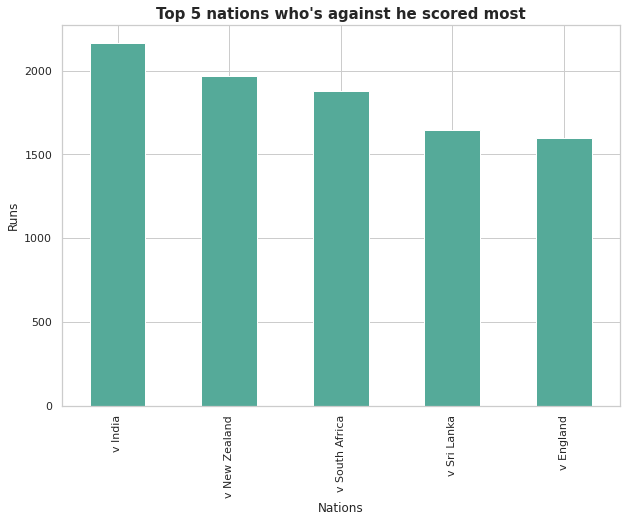

In [338]:
ax = run_s.plot(kind = 'bar')
plt.title("Top 5 nations who's against he scored most", weight='bold').set_fontsize('15')
ax.set(xlabel = 'Nations', ylabel = 'Runs')
plt.gcf().set_size_inches(10, 7)
plt.show()

**Q8) How many centuries he scored in MCG?**

In [339]:
mcg = odi[(odi['Runs'] > 99) & (odi['Ground'] == 'Melbourne')]

In [344]:
mcg = mcg.reset_index()

In [348]:
mcg.drop(columns = ['level_0', 'index'],inplace = True)

In [352]:
mcg.drop(columns = ['4s', '6s', 'Inns', 'Year'],inplace = True)

In [353]:
mcg

,Runs,Pos,Dismissal,Opposition,Ground,Date
0,123.0,4,run out,v Sri Lanka,Melbourne,09-Jan-96
1,100.0,3,caught,v New Zealand,Melbourne,21-Jan-98
2,115.0,3,caught,v India,Melbourne,12-Jan-00
3,119.0,3,caught,v England,Melbourne,15-Dec-02
4,106.0,3,not out,v Sri Lanka,Melbourne,21-Jan-03
5,115.0,3,stumped,v Asia XI,Melbourne,10-Jan-05
6,104.0,3,caught,v New Zealand,Melbourne,04-Feb-07


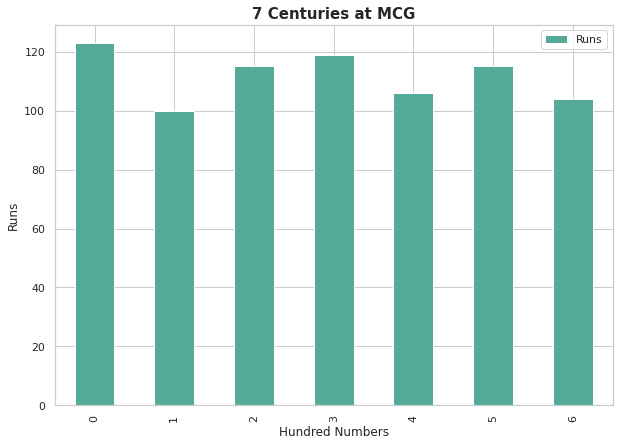

In [355]:
ax = mcg.plot(kind = 'bar')
plt.title("7 Centuries at MCG", weight='bold').set_fontsize('15')
ax.set(xlabel = 'Hundred Numbers', ylabel = 'Runs')
plt.gcf().set_size_inches(10, 7)
plt.show()

He scored 7 hundreds at MCG

**Q9) Which 5 years he scored most runs in ODI?**

In [356]:
odi.head(3)

,Runs,4s,6s,Pos,Dismissal,Inns,Opposition,Ground,Date,Year
1,1.0,0.0,0.0,6,bowled,2.0,v South Africa,Wellington,15-Feb-95,1995
2,10.0,1.0,0.0,6,not out,1.0,v New Zealand,Auckland,19-Feb-95,1995
3,62.0,1.0,1.0,3,caught,1.0,v India,Dunedin,22-Feb-95,1995


In [361]:
top5_y = odi.groupby('Year')['Runs'].sum().sort_values(ascending = False).head(5)

In [362]:
top5_y

Year
2007    1424.0
2009    1198.0
2005    1191.0
1998    1166.0
2003    1154.0
Name: Runs, dtype: float64

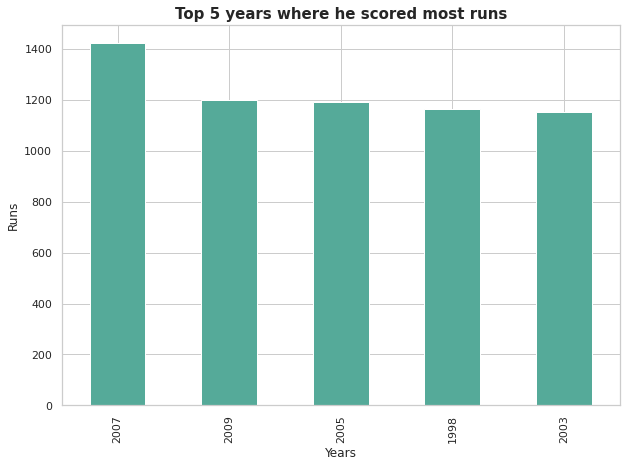

In [364]:
ax = top5_y.plot(kind = 'bar')
plt.title("Top 5 years where he scored most runs", weight='bold').set_fontsize('15')
ax.set(xlabel = 'Years', ylabel = 'Runs')
plt.gcf().set_size_inches(10, 7)
plt.show()

He's best year was indeed 2007

# **Done By Syed Miran Hussain**